# Simulation

In [8]:
## loading package
library(tidyverse)
library(ggsci)
library(patchwork)

In [9]:
setwd("/lustre/project/Stat/s1155168529/programs/DDML/")

## Simualtion with unbalanced data

In [10]:
tib_sim2s_ub1 <- read_csv("output/out_sim2s_ub1_n1000_K5.csv")

Rows: 1000 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): rnd_np, rnd_ds, Average, M1, M2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


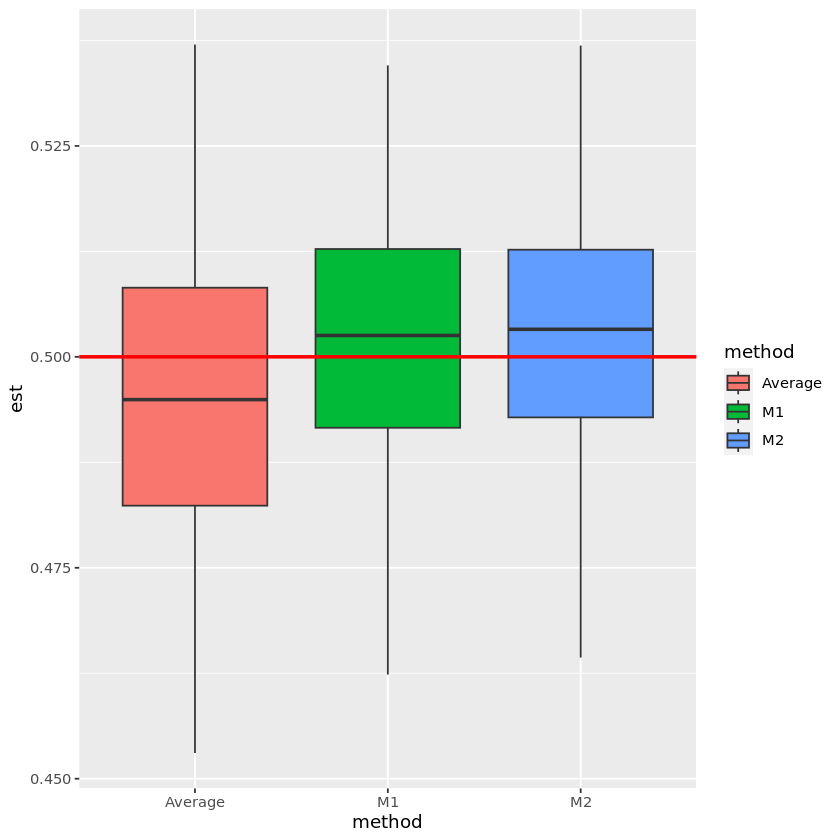

In [11]:
tib_sim2s_ub1 %>% 
    group_by(rnd_np) %>% 
    pivot_longer(
        c(Average, M1, M2), 
        names_to = "method", 
        values_to = "est"
    ) %>% 
    group_by(rnd_np, method) %>% 
    # mutate(est = mean(est)) %>% 
    mutate(est = median(est)) %>% 
    # filter(method != "M1") %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = est, fill = method)
    ) + 
    geom_hline(yintercept = 0.5, size = 1, color = "red")

In [12]:
tib_sim2s_ub2 <- read_csv("output/out_sim2s_ub2_n1000_K5.csv")

Rows: 1000 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): rnd_np, rnd_ds, Average, M1, M2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


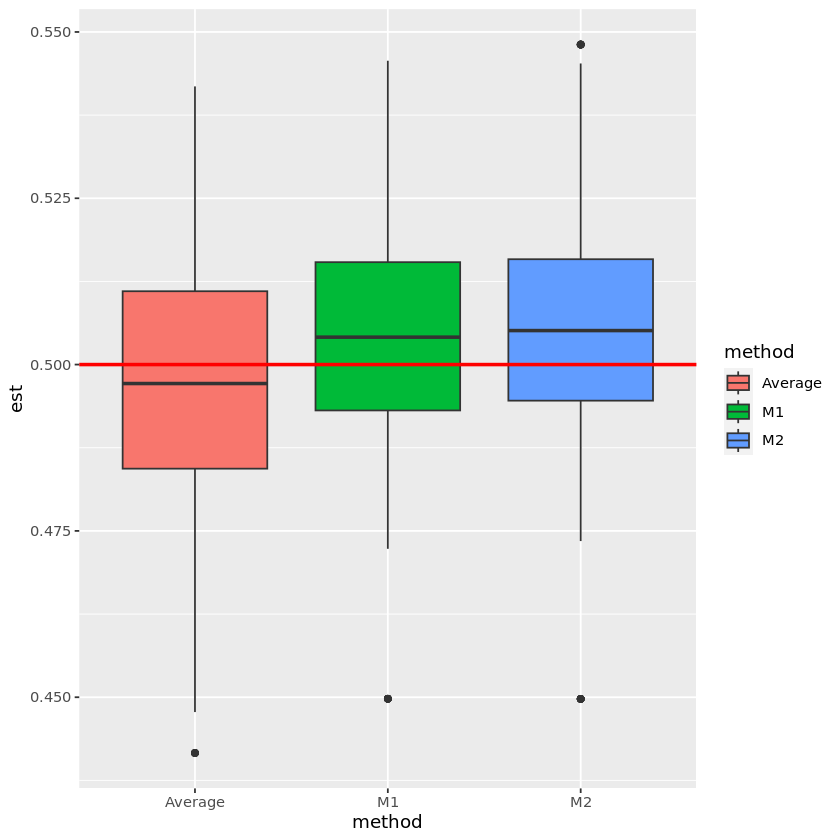

In [13]:
tib_sim2s_ub2 %>% 
    group_by(rnd_np) %>% 
    pivot_longer(
        c(Average, M1, M2), 
        names_to = "method", 
        values_to = "est"
    ) %>% 
    group_by(rnd_np, method) %>% 
    mutate(est = mean(est)) %>% 
    # mutate(est = median(est)) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = est, fill = method)
    ) +
    geom_hline(yintercept = 0.5, size = 1, color = "red")

In [14]:
tib_sim2s_ub1_p20 <- read_csv("output/out_sim2s_ub1_n1000_K5_p20.csv")

cat("progress: ", nrow(tib_sim2s_ub1_p20) / 10, "%")

Rows: 1000 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): rnd_np, rnd_ds, Average, M1, M2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


progress:  100 %

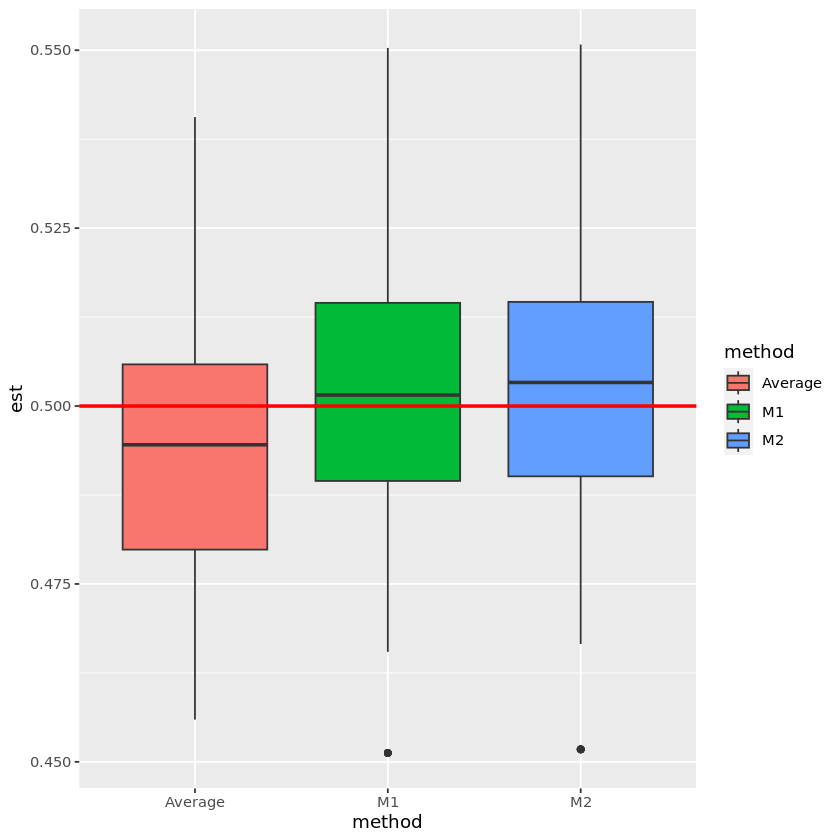

In [15]:
tib_sim2s_ub1_p20 %>% 
    group_by(rnd_np) %>% 
    pivot_longer(
        c(Average, M1, M2), 
        names_to = "method", 
        values_to = "est"
    ) %>% 
    group_by(rnd_np, method) %>% 
    # mutate(est = mean(est)) %>% 
    mutate(est = median(est)) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = est, fill = method)
    ) +
    geom_hline(yintercept = 0.5, size = 1, color = "red")

In [16]:
tib_sim2s_ub2_p20 <- read_csv("output/out_sim2s_ub2_n1000_K5_p20.csv")

cat("progress: ", nrow(tib_sim2s_ub2_p20) / 10, "%")

Rows: 1000 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): rnd_np, rnd_ds, Average, M1, M2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


progress:  100 %

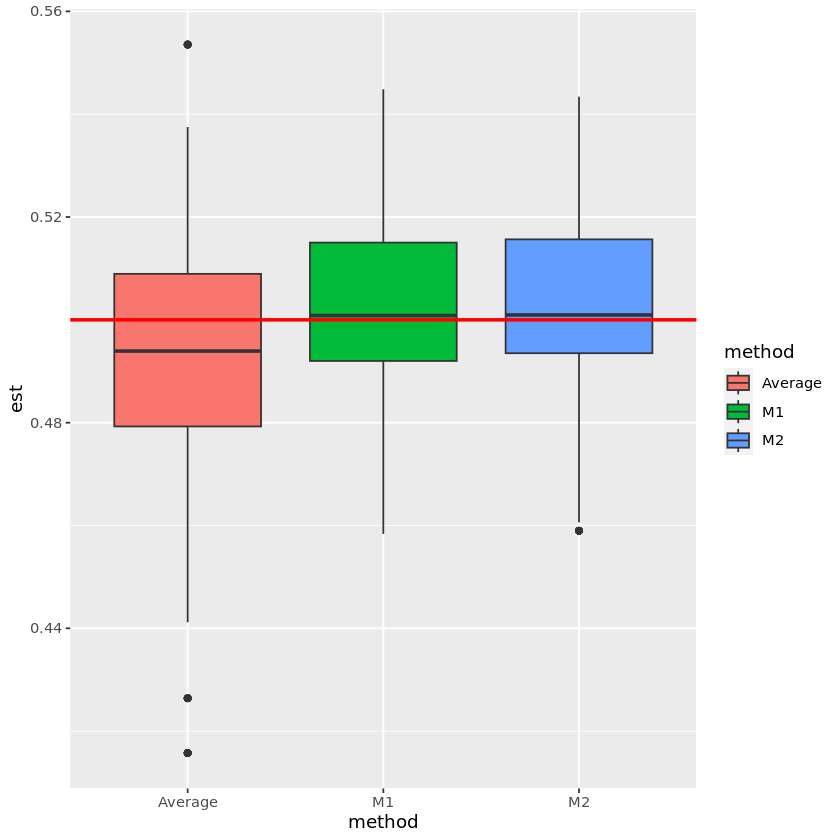

In [17]:
tib_sim2s_ub2_p20 %>% 
    group_by(rnd_np) %>% 
    pivot_longer(
        c(Average, M1, M2), 
        names_to = "method", 
        values_to = "est"
    ) %>% 
    group_by(rnd_np, method) %>% 
    # mutate(est = mean(est)) %>% 
    mutate(est = median(est)) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = est, fill = method)
    ) +
    geom_hline(yintercept = 0.5, size = 1, color = "red")

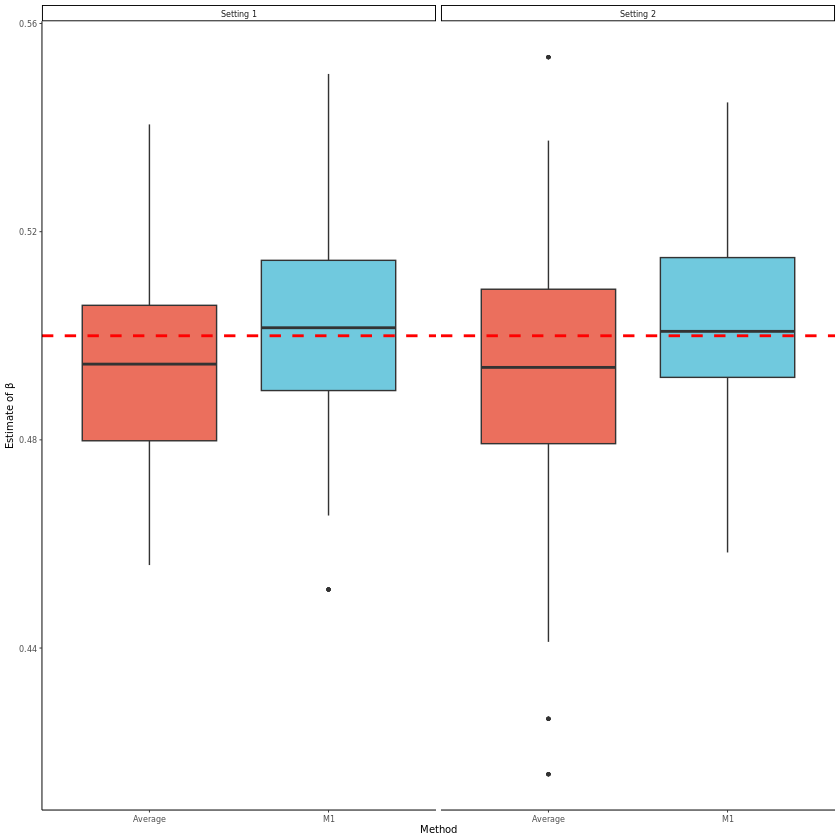

In [18]:
plt_sim2s_ub_p20 <- bind_rows(
    tib_sim2s_ub1_p20 %>% mutate(ub = 1),
    tib_sim2s_ub2_p20 %>% mutate(ub = 2)
)  %>% 
    mutate(ub = factor(ub)) %>% 
    group_by(ub, rnd_np) %>% 
    pivot_longer(
        c(Average, M1, M2), 
        names_to = "method", 
        values_to = "est"
    ) %>% 
    group_by(ub, rnd_np, method) %>% 
    filter(method != "M2") %>% 
    # mutate(est = mean(est)) %>% 
    mutate(est = median(est)) %>% 
    ungroup() %>% 
    mutate(ub = factor(ub, labels = paste("Setting", 1:2))) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = est, fill = method),
        width = .75, outlier.size = .5, alpha = .8, lwd = .4,
        show.legend = FALSE
    ) +
    theme_classic(base_size = 6) + 
    geom_hline(yintercept = 0.5, size = .8, color = "red", lty = "dashed") +
    facet_wrap(~ ub) +
    labs(x = "Method", y = expression(paste("Estimate of ", beta))) +
    scale_fill_npg() 

plt_sim2s_ub_p20

In [19]:
ggsave(
    plt_sim2s_ub_p20 + theme(
        text = element_text(size = 9)
    ), 
    file = "output/plt_sim2s_ub_p20.pdf", 
    height = 2.5, 
    width = 4
)

## Simulation with balanced data

In [20]:
df_K5 <- read_csv(file = "output/sim2s_K5_n1000_p20.csv")
df_K10 <- read_csv(file = "output/sim2s_K10_n1000_p20.csv")

Rows: 1000 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): rnd_np, rnd_ds, Average, M1, M2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1000 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): rnd_np, rnd_ds, Average, M1, M2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


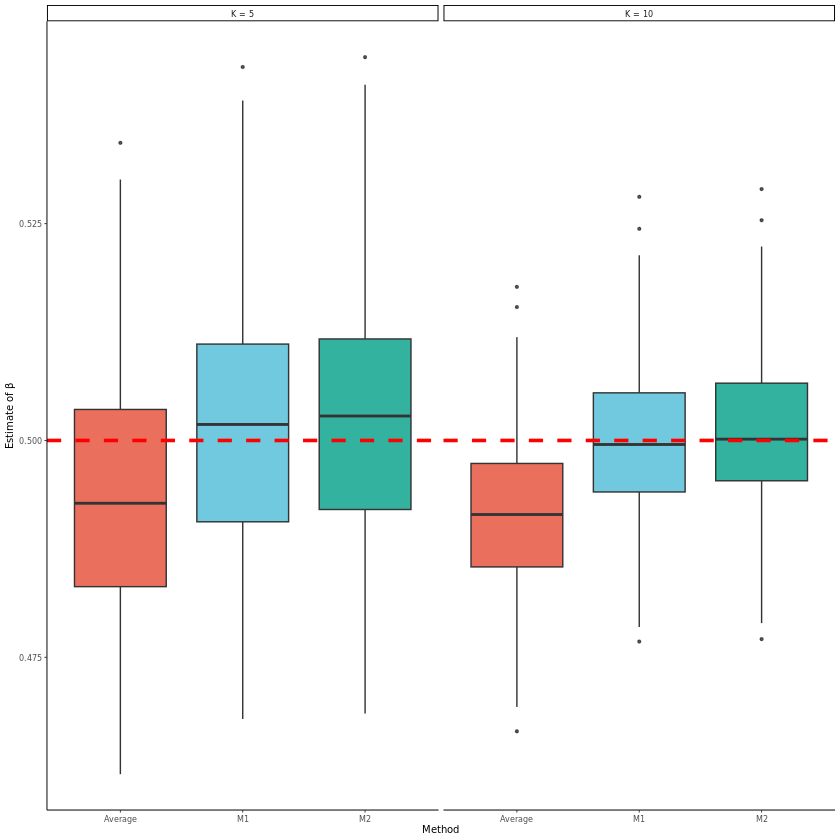

In [21]:
plt_sim2s <- rbind(
    mutate(df_K5, K = 5), 
    mutate(df_K10, K = 10)
) %>% select(-rnd_ds) %>% 
    group_by(rnd_np, K) %>% 
    summarise_at(vars(-group_cols()), mean) %>% 
    ungroup() %>% 
    pivot_longer(-c(rnd_np, K), names_to = "method", values_to = "est") %>% 
    mutate(K = factor(K, labels = paste0("K = ", c(5, 10)))) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = est, fill = method), 
        width = .75, outlier.size = .5, alpha = .8, lwd = .4,
        show.legend = FALSE
    ) + 
    theme_classic(base_size = 6) + 
    geom_hline(yintercept = 0.5, size = 1, color = "red", lty = "dashed") +
    facet_wrap(~ K) +
    labs(x = "Method", y = expression(paste("Estimate of ", beta))) +
    scale_fill_npg()

plt_sim2s

In [22]:
ggsave(
    plt_sim2s + theme(
        text = element_text(size = 9)
    ), 
    file = "output/plt_sim2s_p20.pdf", 
    height = 2.5, 
    width = 5
)

## Simulation with covariance shift

In [23]:
df_sim2s_cs <- read_csv(
    "output/out_sim2cs_expt2_sdcs01.csv", 
    show_col_types = FALSE
)

In [24]:
df_sim2s_cs %>% print(n = 10)

# A tibble: 1,000 × 5
   rnd_gen rnd_ds Average    M1   Ms1
     <dbl>  <dbl>   <dbl> <dbl> <dbl>
 1    2023   2023   0.481 0.493 0.493
 2    2023   2024   0.488 0.494 0.494
 3    2023   2025   0.490 0.498 0.498
 4    2023   2026   0.488 0.498 0.497
 5    2023   2027   0.486 0.495 0.494
 6    2023   2028   0.491 0.501 0.501
 7    2023   2029   0.498 0.503 0.503
 8    2023   2030   0.491 0.502 0.501
 9    2023   2031   0.497 0.505 0.505
10    2023   2032   0.480 0.483 0.483
# ℹ 990 more rows


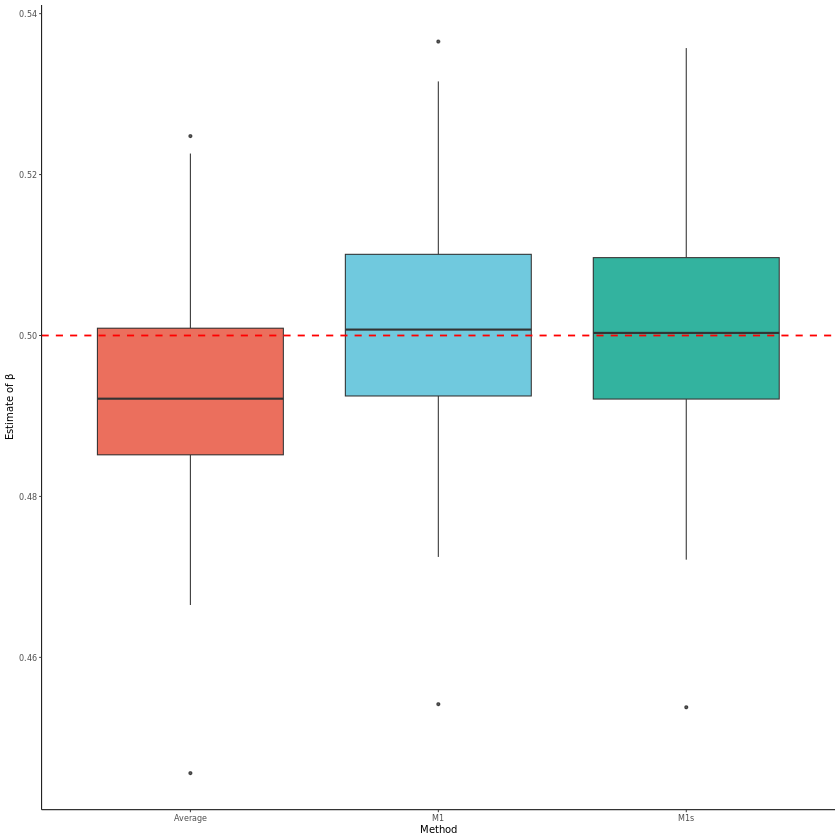

In [25]:
plt_sim2cs <- df_sim2s_cs %>% 
    rename(M1s = Ms1) %>%
    select(-rnd_ds) %>% 
    group_by(rnd_gen) %>% 
    summarise_at(vars(-group_cols()), mean) %>% 
    pivot_longer(
        cols = -rnd_gen, 
        names_to = "method", 
        values_to = "est"
    ) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = est, fill = method), 
        width = .75, outlier.size = .5, alpha = .8, lwd = .3,
        show.legend = FALSE
    ) + 
    theme_classic(base_size = 6) + 
    geom_hline(yintercept = 0.5, size = 0.5, color = "red", lty = "dashed") +
    labs(x = "Method", y = expression(paste("Estimate of ", beta))) +
    # ylim(.46, .54) +
    scale_fill_npg()

plt_sim2cs

In [26]:
ggsave(
    plt_sim2cs + theme(
        text = element_text(size = 9)
    ), 
    file = "output/plt_sim2cs_p20.pdf", 
    height = 2.5, 
    width = 3
)

## Simulation PLIVR

In [27]:
vec_file_sim3s <- list.files("output")

vec_file_sim3s_targ <- vec_file_sim3s[
    str_detect(vec_file_sim3s, "out_sim3s_edg_jd_K\\d+_n1000_p20_.*_new.csv")
]

tib_comb <- tibble()

for (file_cur in vec_file_sim3s_targ) {
    tib_cur <- read_csv(
        file = file.path("output", file_cur), 
        show_col_types = FALSE
    )
    tib_comb <- tib_comb %>% 
        rbind(
            tib_cur %>% mutate(
                K = str_extract(file_cur, "(?<=K)\\d+"), 
                psid = str_extract(file_cur, "(?<=psid)\\d+")
            )
        )
}

tib_comb %>% print(n = 10)

# A tibble: 6,000 × 7
   rnd_np rnd_ds Average    M1    M2 K     psid 
    <dbl>  <dbl>   <dbl> <dbl> <dbl> <chr> <chr>
 1    128    128   0.486 0.492 0.493 10    01   
 2    128    129   0.466 0.472 0.475 10    01   
 3    128    130   0.470 0.477 0.479 10    01   
 4    128    131   0.494 0.506 0.509 10    01   
 5    128    132   0.494 0.501 0.501 10    01   
 6    128    133   0.454 0.463 0.464 10    01   
 7    128    134   0.491 0.494 0.496 10    01   
 8    128    135   0.477 0.484 0.486 10    01   
 9    128    136   0.454 0.460 0.463 10    01   
10    128    137   0.471 0.468 0.474 10    01   
# ℹ 5,990 more rows


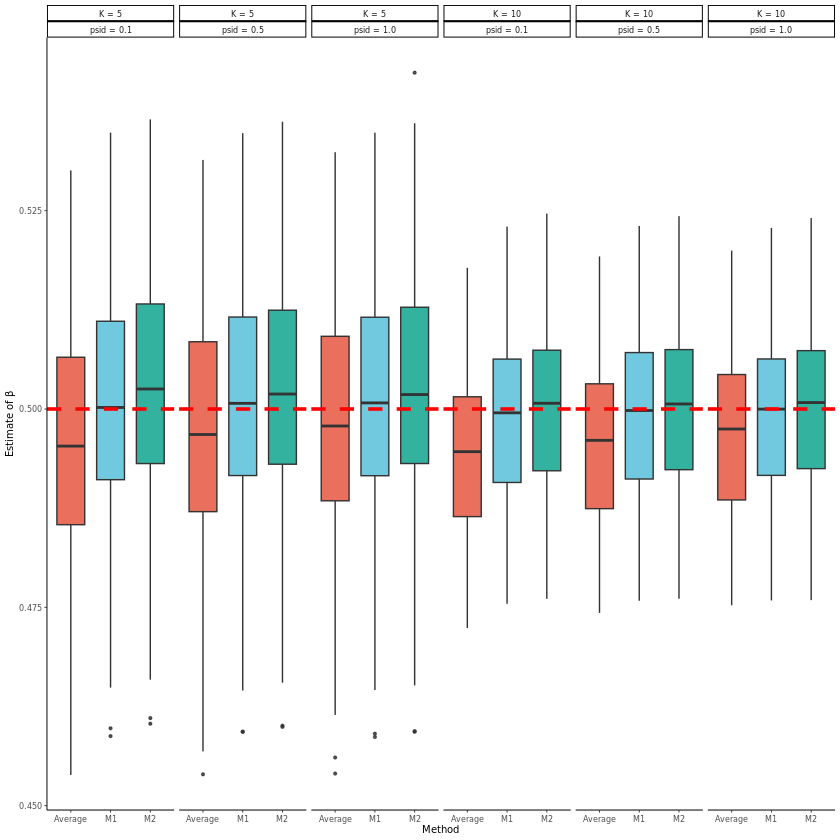

In [28]:
plt_sim3s <- tib_comb %>% 
    group_by(rnd_np, K, psid) %>% 
    select(-rnd_ds) %>% 
    summarise_at(vars(-group_cols()), mean) %>% 
    ungroup() %>% 
    mutate(
        K = factor(K, levels = c(5, 10), labels = paste0("K = ", c(5, 10))), 
        psid = factor(
            psid, levels = c("01", "05", "1"), 
            labels = paste0("psid = ", c("0.1", "0.5", "1.0"))
        )
    ) %>% 
    select(-rnd_np) %>% 
    pivot_longer(
        cols = -c(psid, K), 
        names_to = "method", 
        values_to = "est"
    ) %>% 
    ggplot() + 
    geom_boxplot(
        mapping = aes(x = method, y = est, fill = method),
        width = .7, outlier.size = .5, alpha = .8, lwd = .4,
        show.legend = FALSE
    ) + 
    # theme_classic(base_size = 4) + 
    theme_classic(base_size = 6) + 
    geom_hline(yintercept = 0.5, size = 1, color = "red", lty = "dashed") +
    facet_wrap(~ K + psid, nrow = 1) +
    labs(x = "Method", y = expression(paste("Estimate of ", beta))) +
    scale_fill_npg()

plt_sim3s

In [29]:
ggsave(
    plt_sim3s + theme(
        text = element_text(size = 9)
    ), 
    file = "output/plt_sim3s_p20.pdf", 
    height = 2.5, 
    width = 6
)

## Combination

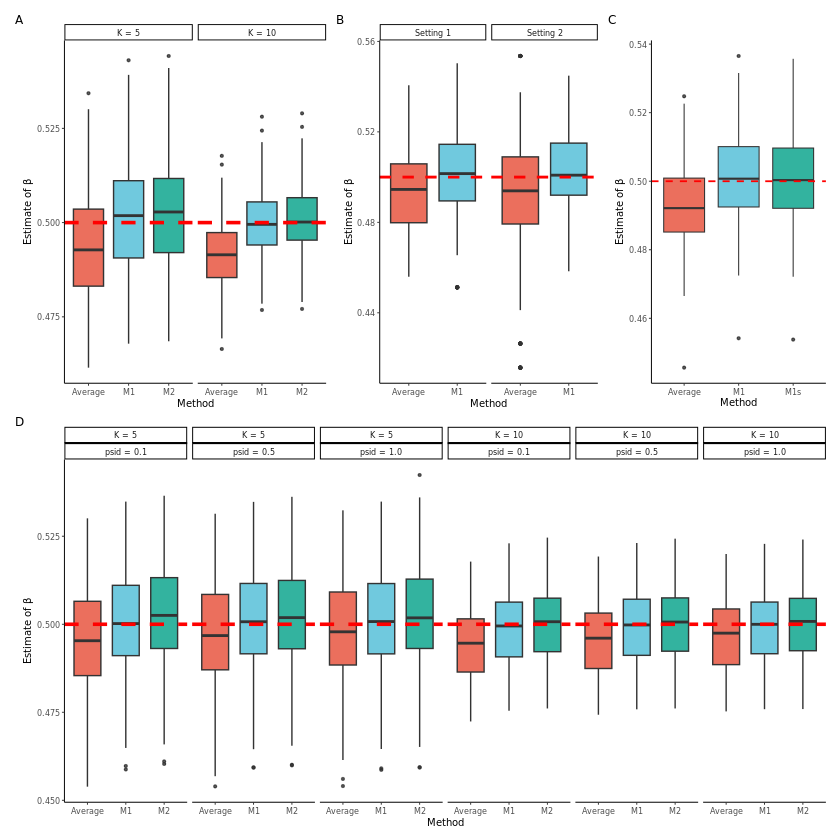

In [30]:
plt_comb <- (
    plt_sim2s + plt_sim2s_ub_p20 + plt_sim2cs + 
    plot_layout(widths = c(6, 5, 4))
) / plt_sim3s + 
    plot_annotation(
        tag_levels = list(c("A", "B", "C", "D"))
    )

plt_comb

In [31]:
ggsave(
    plt_comb & 
    theme_classic(base_size = 1) + 
    theme(
        text = element_text(size = 8),
        plot.tag = element_text(face = "bold")
    ), 
    file = "output/plt_comb.pdf", 
    height = 4, 
    width = 6
)